In [14]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import FunctionTransformer

In [15]:
# Sine Transformer
def sin_feature(period):
    return FunctionTransformer(lambda x:np.sin(x/period*2*np.pi))

# Cosine Transformer
def cos_feature(period):
    return FunctionTransformer(lambda x:np.cos(x/period*2*np.pi))

In [16]:
dates = pd.date_range(start='2024-01-01', end='2026-12-31')
df_d = pd.DataFrame(index=dates)

In [17]:
# create data features 
df_d['month'] = df_d.index.month
df_d['day_of_week'] = df_d.index.day_of_week
df_d['day_of_year'] = df_d.index.day_of_year

## applying the transformations

# month encoding
df_d['sin_month'] = sin_feature(12).fit_transform(df_d['month'])
df_d['cos_month'] = cos_feature(12).fit_transform(df_d['month'])

# day encoding 
df_d['sin_day'] = sin_feature(365.25).fit_transform(df_d['day_of_year'])
df_d['cos_day'] = cos_feature(365.25).fit_transform(df_d['day_of_year'])

# week encoding 
df_d['sin_dow'] = sin_feature(7).fit_transform(df_d['day_of_week'])
df_d['cos_dow'] = cos_feature(7).fit_transform(df_d['day_of_week'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


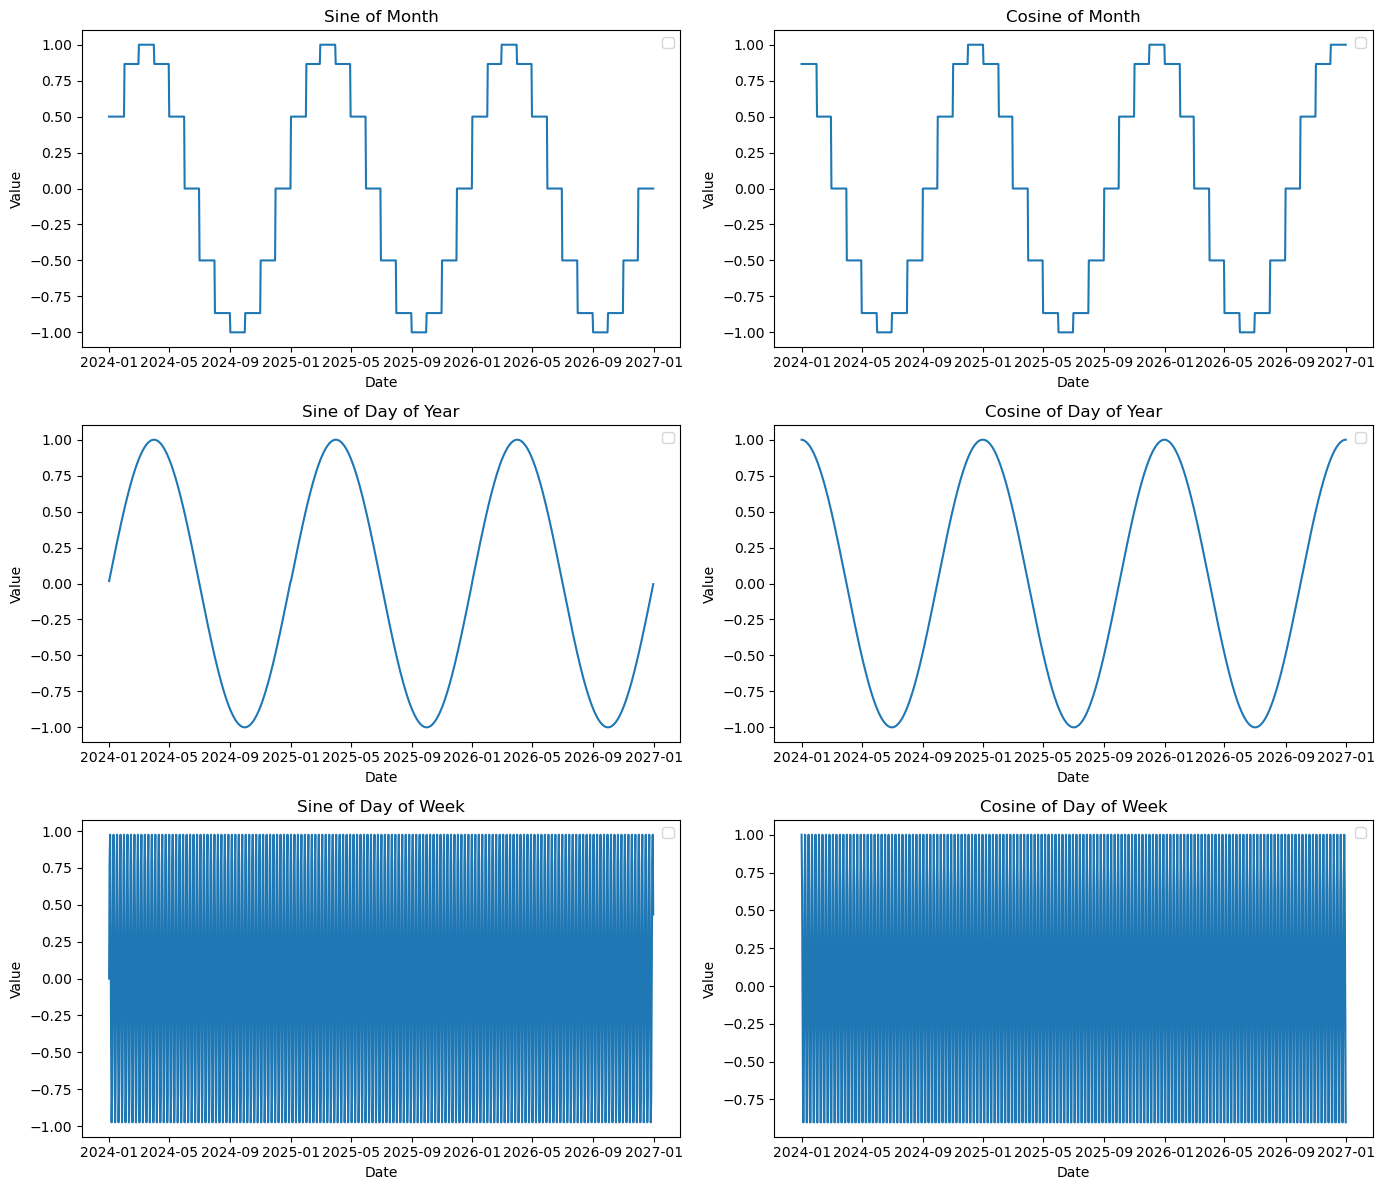

In [18]:
# plotting using matplot 

import matplotlib.pyplot as plt 

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

axes[0].plot(df_d.index, df_d['sin_month'])
axes[0].set_title('Sine of Month')
axes[1].plot(df_d.index, df_d['cos_month'])
axes[1].set_title('Cosine of Month')

axes[2].plot(df_d.index, df_d['sin_day'])
axes[2].set_title('Sine of Day of Year')
axes[3].plot(df_d.index, df_d['cos_day'])
axes[3].set_title('Cosine of Day of Year')

axes[4].plot(df_d.index, df_d['sin_dow'])
axes[4].set_title('Sine of Day of Week')
axes[5].plot(df_d.index, df_d['cos_dow'])
axes[5].set_title('Cosine of Day of Week')

for ax in axes:
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()